In [1]:
#필요한 모듈 불러오기
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import koreanize_matplotlib
import warnings
warnings.simplefilter("ignore")

In [2]:
#데이터 불러오기
crime = pd.read_excel("5_20221018192142.xlsx",engine = "openpyxl")
crime.head(4)

,장소별(1),장소별(2),범죄별(1),범죄별(2),2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,계,소계,계,소계,137725.0,132966.0,130674.0,126401.0,117839.0,107835.0,101948.0,103668.0,92679.0,80445.0
1,NaN,NaN,NaN,살인,179.0,152.0,158.0,163.0,148.0,142.0,143.0,136.0,141.0,124.0
2,NaN,NaN,NaN,강도,570.0,420.0,343.0,276.0,262.0,169.0,143.0,136.0,138.0,122.0
3,NaN,NaN,NaN,강간강제추행,4908.0,5387.0,5462.0,5449.0,6002.0,6963.0,6412.0,6469.0,5763.0,4911.0


In [3]:
# 데이터 크기 확인
crime.shape

(84, 14)

In [4]:
#데이터 기본 정보 출력
crime.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   장소별(1)  1 non-null      object 
 1   장소별(2)  14 non-null     object 
 2   범죄별(1)  14 non-null     object 
 3   범죄별(2)  84 non-null     object 
 4   2012    84 non-null     object 
 5   2013    84 non-null     object 
 6   2014    84 non-null     object 
 7   2015    84 non-null     object 
 8   2016    84 non-null     object 
 9   2017    84 non-null     object 
 10  2018    84 non-null     object 
 11  2019    84 non-null     object 
 12  2020    84 non-null     object 
 13  2021    84 non-null     float64
dtypes: float64(1), object(13)
memory usage: 9.3+ KB


In [5]:
#데이터 기술 통계 정보 요약
crime.describe()

,2021
count,84.000000
mean,3830.714286
std,10929.923937
min,0.000000
25%,24.750000
50%,385.000000
75%,1733.000000
max,80445.000000


In [6]:
# 고유값 개수
crime.value_counts()

장소별(1)  장소별(2)  범죄별(1)  범죄별(2)  2012      2013      2014      2015      2016      2017      2018      2019      2020     2021   
계       소계      계       소계      137725.0  132966.0  130674.0  126401.0  117839.0  107835.0  101948.0  103668.0  92679.0  80445.0    1
dtype: int64

In [7]:
#누락데이터 찾기
crime.isnull().sum().sum()

223

In [8]:
crime.columns

Index(['장소별(1)', '장소별(2)', '범죄별(1)', '범죄별(2)', '2012', '2013', '2014', '2015',
       '2016', '2017', '2018', '2019', '2020', '2021'],
      dtype='object')

In [9]:
# 행 삭제 하기
crime = crime.drop(["장소별(1)","범죄별(1)","범죄별(2)","2012","2013","2021"],axis=1)

In [10]:
#일부 데이터 보기
crime.head(4)

,장소별(2),2014,2015,2016,2017,2018,2019,2020
0,소계,130674.0,126401.0,117839.0,107835.0,101948.0,103668.0,92679.0
1,NaN,158.0,163.0,148.0,142.0,143.0,136.0,141.0
2,NaN,343.0,276.0,262.0,169.0,143.0,136.0,138.0
3,NaN,5462.0,5449.0,6002.0,6963.0,6412.0,6469.0,5763.0


In [11]:
# 계 행 삭제하기
crime = crime.drop([0,1,2,3,4,5],axis =0)
crime.head(5)

,장소별(2),2014,2015,2016,2017,2018,2019,2020
6,아파트 연립다세대,5671.0,5039.0,4660.0,4523.0,7682.0,8999.0,9597.0
7,NaN,22.0,20.0,12.0,21.0,29.0,25.0,32.0
8,NaN,37.0,20.0,20.0,20.0,10.0,7.0,11.0
9,NaN,296.0,283.0,284.0,319.0,441.0,533.0,556.0
10,NaN,2765.0,1866.0,1504.0,1209.0,1907.0,2455.0,2867.0


In [12]:
#결측지 값 제거
crime=crime.dropna()

In [13]:
crime["장소별(2)"].value_counts()

아파트 연립다세대    1
단독주택         1
노상           1
상점           1
숙박업소목욕탕      1
유흥접객업소       1
사무실          1
역대합실         1
교통수단         1
유원지          1
학교           1
금융기관         1
기타           1
Name: 장소별(2), dtype: int64

In [14]:
#이름 변경해주기
crime = crime.rename(columns = {"장소별(2)":"장소"})
crime.head(4)

,장소,2014,2015,2016,2017,2018,2019,2020
6,아파트 연립다세대,5671.0,5039.0,4660.0,4523.0,7682.0,8999.0,9597.0
12,단독주택,7325.0,6408.0,6266.0,5092.0,8150.0,8757.0,8200.0
18,노상,39067.0,37548.0,35003.0,32063.0,32372.0,32295.0,29395.0
24,상점,5068.0,4816.0,5385.0,5047.0,8635.0,10092.0,9626.0


In [15]:
crime.dtypes

장소      object
2014    object
2015    object
2016    object
2017    object
2018    object
2019    object
2020    object
dtype: object

In [18]:
#행 데이터를 열 데이터로 변경하기
crime = crime.melt(id_vars = crime.columns[:1],var_name = "연도", value_name = "발생건수")
crime.head(4)

,장소,연도,발생건수
0,아파트 연립다세대,2014,5671
1,단독주택,2014,7325
2,노상,2014,39067
3,상점,2014,5068


In [29]:
#데이터 타입 바꾸기
crime["연도"] = crime["연도"].astype("int")
crime["발생건수"] = crime["발생건수"].astype("int")
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   장소      91 non-null     object
 1   연도      91 non-null     int64 
 2   발생건수    91 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 2.3+ KB


In [26]:
px.histogram(crime, x = "발생건수", y ="장소", histfunc='sum',title="장소별 발생건수")

<AxesSubplot:xlabel='연도', ylabel='발생건수'>

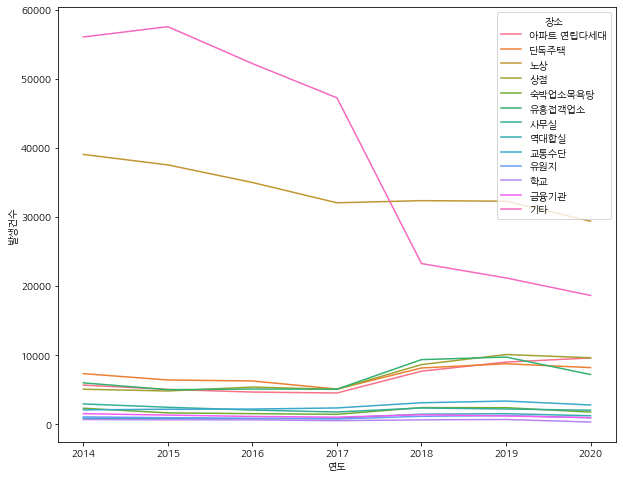

In [20]:
plt.figure(figsize =(10,8))
sns.lineplot(data=crime, x="연도", y="발생건수",hue="장소")

<AxesSubplot:xlabel='연도', ylabel='발생건수'>

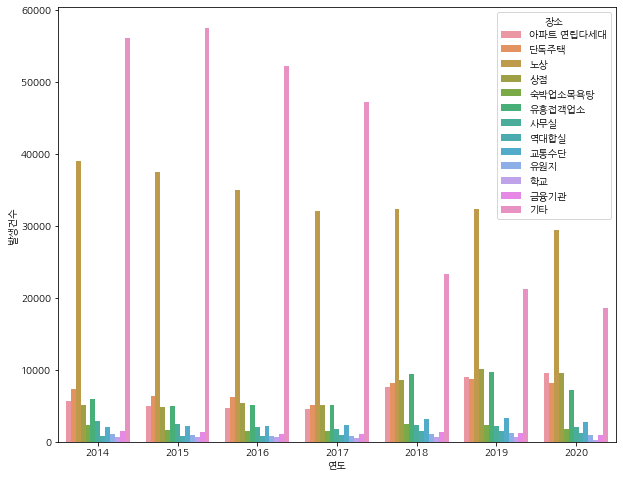

In [22]:
plt.figure(figsize =(10,8))
sns.barplot(data=crime, x="연도", y="발생건수",hue="장소")

In [23]:
crime_year = crime.groupby(["연도","장소"])["발생건수"].mean().unstack()

<AxesSubplot:title={'center':'년도별 장소에 따른,범죄 증감률'}, xlabel='연도'>

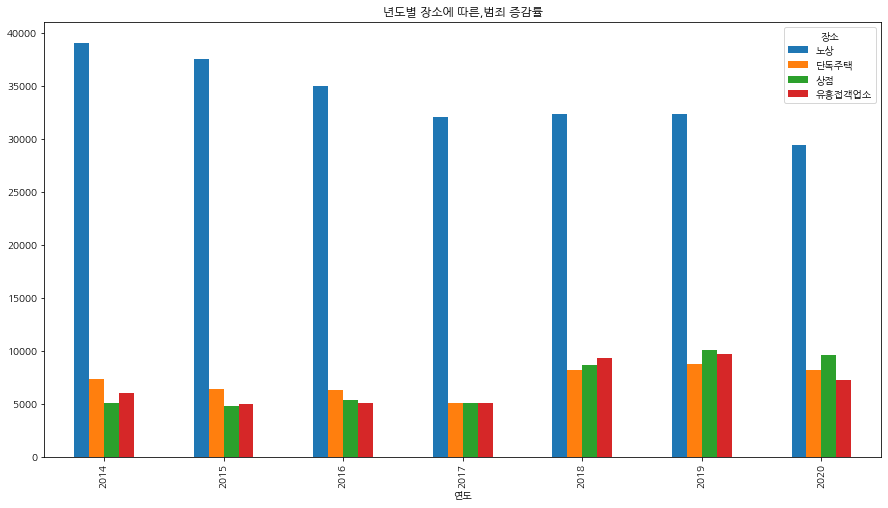

In [24]:
crime_year[["노상","단독주택","상점","유흥접객업소"]].plot(kind = "bar",figsize = (15,8),title="년도별 장소에 따른,범죄 증감률")